In [143]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import scipy
import statsmodels.formula.api as smf
import statsmodels.api as sm

from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import StackingClassifier

In [189]:
train = pd.read_csv ('https://raw.githubusercontent.com/claradelatorre/Test2ML-Classifier/main/train.csv')
test = pd.read_csv ('https://raw.githubusercontent.com/claradelatorre/Test2ML-Classifier/main/test.csv')

In [190]:
train.drop(['ID'] ,axis= 1 , inplace = True)

In [191]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Customer_ID               80000 non-null  int64  
 1   Month                     80000 non-null  int64  
 2   Name                      80000 non-null  object 
 3   Age                       80000 non-null  float64
 4   SSN                       80000 non-null  float64
 5   Occupation                80000 non-null  object 
 6   Annual_Income             80000 non-null  float64
 7   Monthly_Inhand_Salary     80000 non-null  float64
 8   Num_Bank_Accounts         80000 non-null  float64
 9   Num_Credit_Card           80000 non-null  float64
 10  Interest_Rate             80000 non-null  float64
 11  Num_of_Loan               80000 non-null  float64
 12  Type_of_Loan              80000 non-null  object 
 13  Delay_from_due_date       80000 non-null  float64
 14  Num_of

In [192]:
train.head()

,Customer_ID,Month,Name,Age,SSN,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,3985,4,Lawrencez,40.0,856431180.0,Accountant,97384.44,8167.370000,1.0,3.0,...,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909,Standard
1,49494,2,Mohammedr,39.0,417453942.0,Writer,31369.58,2607.131667,8.0,9.0,...,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383,Standard
2,2925,6,Alistairn,17.0,499528888.0,Writer,30171.86,2772.321667,6.0,7.0,...,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615,Standard
3,21358,2,Dinesh Naire,22.0,859449371.0,Doctor,13100.02,1246.668333,7.0,5.0,...,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832,Standard
4,21221,4,Bakerg,26.0,485239890.0,Doctor,62313.54,5120.795000,6.0,2.0,...,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902,Standard


In [193]:
#Eliminamos datos inútiles

train.drop(['Customer_ID','Name','SSN'] ,axis= 1 , inplace = True)

In [194]:
train.head()

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance,Credit_Score
0,4,40.0,Accountant,97384.44,8167.370000,1.0,3.0,8.0,1.0,Debt Consolidation Loan,...,Good,405.45,32.643281,336.0,No,77.284943,53.714219,High_spent_Large_value_payments,847.172909,Standard
1,2,39.0,Writer,31369.58,2607.131667,8.0,9.0,27.0,8.0,"Home Equity Loan, Not Specified, Not Specified...",...,Bad,4259.91,39.375507,144.0,Yes,171.748418,44.990811,High_spent_Large_value_payments,280.855383,Standard
2,6,17.0,Writer,30171.86,2772.321667,6.0,7.0,30.0,9.0,"Personal Loan, Home Equity Loan, Home Equity L...",...,Bad,3406.51,34.039021,123.0,Yes,205.403926,40.781489,High_spent_Large_value_payments,247.322615,Standard
3,2,22.0,Doctor,13100.02,1246.668333,7.0,5.0,6.0,5.0,"Credit-Builder Loan, Credit-Builder Loan, Not ...",...,Standard,727.29,34.747262,129.0,Yes,41.177132,23.005463,Low_spent_Large_value_payments,298.156832,Standard
4,4,26.0,Doctor,62313.54,5120.795000,6.0,2.0,18.0,4.0,"Auto Loan, Payday Loan, Student Loan, and Cred...",...,Standard,817.64,24.545394,122.0,NM,196.679642,63.346750,Low_spent_Medium_value_payments,152.669902,Standard


In [195]:
from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for column in train.columns:
  if train[column].dtypes == 'object':
    train[column] = ordinal_encoder.fit_transform(train[[column]])


from sklearn.preprocessing import OrdinalEncoder
ordinal_encoder = OrdinalEncoder()
for column in test.columns:
  if test[column].dtypes == 'object':
    test[column] = ordinal_encoder.fit_transform(test[[column]])

In [202]:
#Separamos las variables.
#Variable objetivo:
y = train.iloc[:,-1]
y

0        2.0
1        2.0
2        2.0
3        2.0
4        2.0
        ... 
79995    2.0
79996    1.0
79997    2.0
79998    1.0
79999    0.0
Name: Credit_Score, Length: 80000, dtype: float64

In [201]:
#Demás variables:
X = train.iloc[:,0:23]
X

,Month,Age,Occupation,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,...,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_Utilization_Ratio,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Payment_Behaviour,Monthly_Balance
0,4,40.0,0.0,97384.44,8167.370000,1.0,3.0,8.0,1.0,1410.0,...,3.0,1.0,405.45,32.643281,336.0,1.0,77.284943,53.714219,0.0,847.172909
1,2,39.0,14.0,31369.58,2607.131667,8.0,9.0,27.0,8.0,2528.0,...,6.0,0.0,4259.91,39.375507,144.0,2.0,171.748418,44.990811,0.0,280.855383
2,6,17.0,14.0,30171.86,2772.321667,6.0,7.0,30.0,9.0,5143.0,...,10.0,0.0,3406.51,34.039021,123.0,2.0,205.403926,40.781489,0.0,247.322615
3,2,22.0,3.0,13100.02,1246.668333,7.0,5.0,6.0,5.0,811.0,...,8.0,2.0,727.29,34.747262,129.0,2.0,41.177132,23.005463,3.0,298.156832
4,4,26.0,3.0,62313.54,5120.795000,6.0,2.0,18.0,4.0,520.0,...,9.0,2.0,817.64,24.545394,122.0,0.0,196.679642,63.346750,4.0,152.669902
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79995,7,50.0,10.0,107761.29,9047.107500,4.0,5.0,9.0,0.0,3463.0,...,3.0,2.0,34.09,41.899992,211.0,2.0,0.000000,150.220682,0.0,984.123010
79996,2,33.0,12.0,16218.32,1098.526667,6.0,6.0,21.0,5.0,3004.0,...,6.0,0.0,4466.33,24.275710,98.0,0.0,64.533114,34.457893,2.0,260.523798
79997,6,25.0,4.0,29374.77,2377.897500,3.0,7.0,6.0,2.0,6258.0,...,7.0,2.0,1189.37,38.439021,241.0,0.0,40.264074,22.234178,1.0,403.980355
79998,7,15.0,8.0,43782.45,3543.537500,6.0,9.0,25.0,8.0,4189.0,...,12.0,0.0,3468.25,24.233841,85.0,2.0,240.664739,42.839562,3.0,146.741586


In [205]:
from sklearn.feature_selection import mutual_info_classif
mutual_info = mutual_info_classif(X, y)
mutual_info

array([0.        , 0.02574527, 0.00523192, 0.60596066, 0.5994867 ,
       0.10481742, 0.10991611, 0.17194952, 0.08808837, 0.32996594,
       0.119526  , 0.090188  , 0.10183768, 0.11649016, 0.19119941,
       0.59807566, 0.        , 0.10259035, 0.10891482, 0.54553217,
       0.59929744, 0.01200752, 0.03416005])

In [207]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X.columns
mutual_info.sort_values(ascending=False)

Annual_Income               0.605961
Monthly_Inhand_Salary       0.599487
Amount_invested_monthly     0.599297
Outstanding_Debt            0.598076
Total_EMI_per_month         0.545532
Type_of_Loan                0.329966
Credit_Mix                  0.191199
Interest_Rate               0.171950
Delay_from_due_date         0.119526
Num_Credit_Inquiries        0.116490
Num_Credit_Card             0.109916
Payment_of_Min_Amount       0.108915
Num_Bank_Accounts           0.104817
Credit_History_Age          0.102590
Changed_Credit_Limit        0.101838
Num_of_Delayed_Payment      0.090188
Num_of_Loan                 0.088088
Monthly_Balance             0.034160
Age                         0.025745
Payment_Behaviour           0.012008
Occupation                  0.005232
Credit_Utilization_Ratio    0.000000
Month                       0.000000
dtype: float64

<AxesSubplot: >

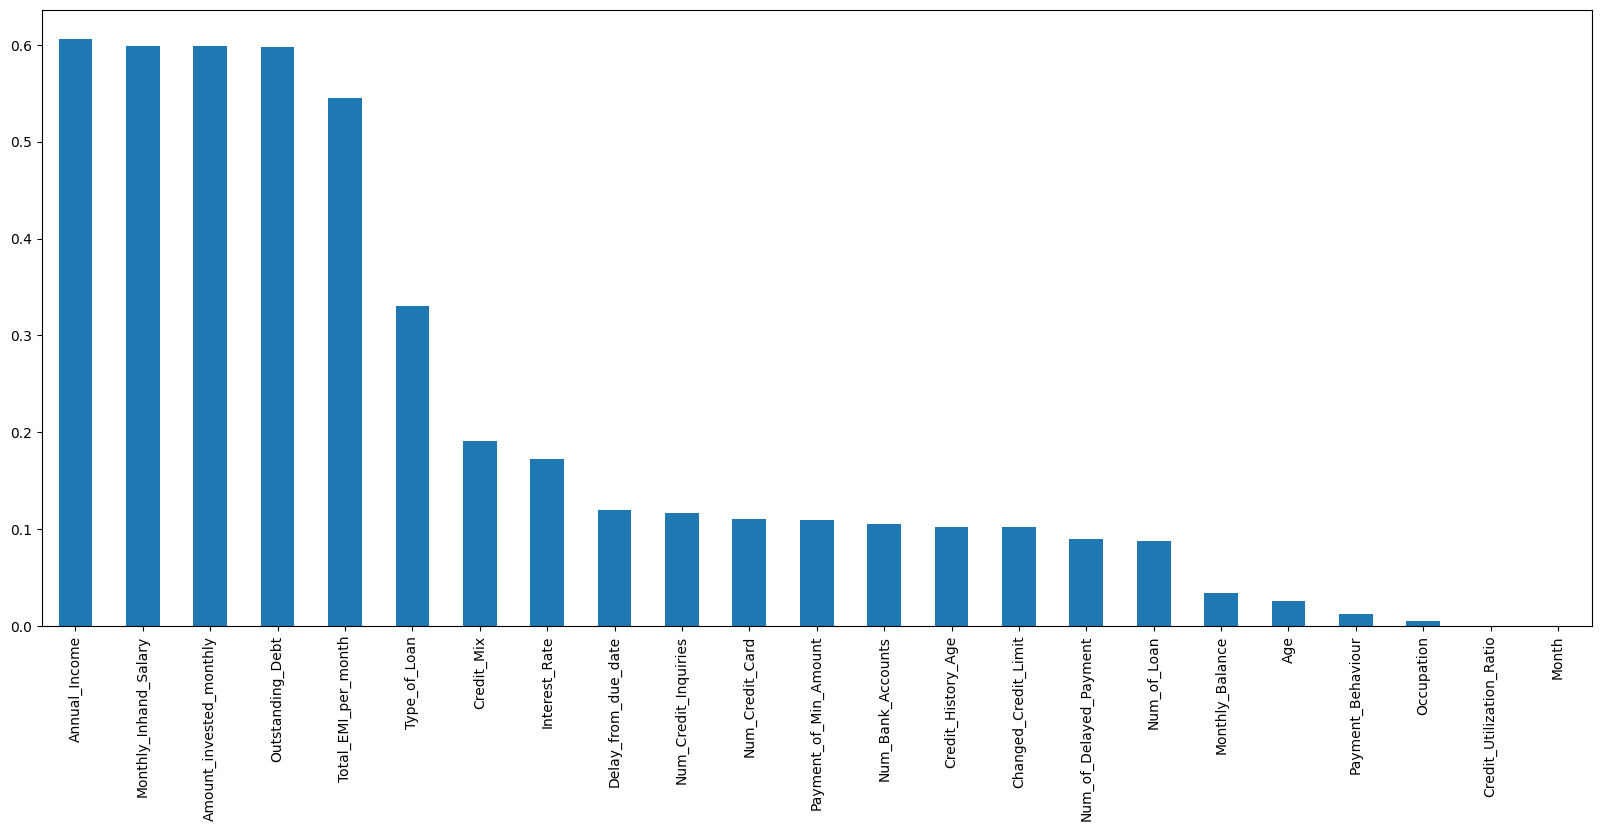

In [208]:
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [209]:
train.drop(['Month','Occupation','Credit_Utilization_Ratio','Payment_Behaviour'] ,axis= 1 , inplace = True)

In [213]:
train.head(5)

,Age,Annual_Income,Monthly_Inhand_Salary,Num_Bank_Accounts,Num_Credit_Card,Interest_Rate,Num_of_Loan,Type_of_Loan,Delay_from_due_date,Num_of_Delayed_Payment,Changed_Credit_Limit,Num_Credit_Inquiries,Credit_Mix,Outstanding_Debt,Credit_History_Age,Payment_of_Min_Amount,Total_EMI_per_month,Amount_invested_monthly,Monthly_Balance,Credit_Score
0,40.0,97384.44,8167.370000,1.0,3.0,8.0,1.0,1410.0,20.0,12.0,0.52,3.0,1.0,405.45,336.0,1.0,77.284943,53.714219,847.172909,2.0
1,39.0,31369.58,2607.131667,8.0,9.0,27.0,8.0,2528.0,30.0,25.0,19.70,6.0,0.0,4259.91,144.0,2.0,171.748418,44.990811,280.855383,2.0
2,17.0,30171.86,2772.321667,6.0,7.0,30.0,9.0,5143.0,49.0,18.0,23.49,10.0,0.0,3406.51,123.0,2.0,205.403926,40.781489,247.322615,2.0
3,22.0,13100.02,1246.668333,7.0,5.0,6.0,5.0,811.0,6.0,20.0,10.64,8.0,2.0,727.29,129.0,2.0,41.177132,23.005463,298.156832,2.0
4,26.0,62313.54,5120.795000,6.0,2.0,18.0,4.0,520.0,27.0,8.0,12.82,9.0,2.0,817.64,122.0,0.0,196.679642,63.346750,152.669902,2.0


In [210]:
def fit_knn(x,y, **kwargs):
    return KNeighborsClassifier(**kwargs).fit(x,y)

In [211]:
def eval_classifier(classifier, x_valid, y_valid, y_pred):
    print(classification_report(y_pred, y_valid))
    plot_confusion_matrix(classifier, x_valid, y_valid, display_labels=set(y_valid.values), cmap=plt.cm.Blues)

              precision    recall  f1-score   support

         0.0       0.89      0.85      0.87     14875
         1.0       0.92      0.86      0.89     24715
         2.0       0.87      0.91      0.89     40410

    accuracy                           0.88     80000
   macro avg       0.89      0.87      0.88     80000
weighted avg       0.89      0.88      0.88     80000



/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


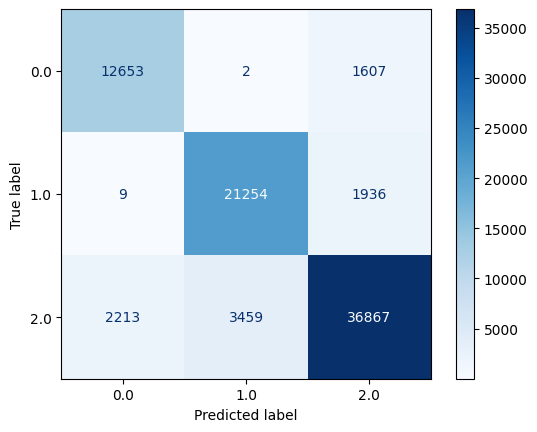

In [212]:

classifier_1=fit_knn(x,y, n_neighbors=3)
y_pred=classifier_1.predict(x)
eval_classifier(classifier_1, x, y, y_pred)